In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


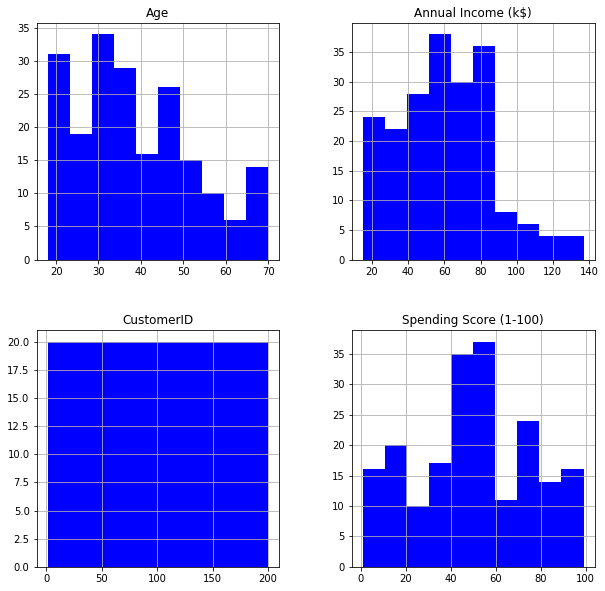

In [6]:
df.hist(figsize=(10,10), color='blue')
plt.show()

In [8]:
df.drop('CustomerID', axis=1, inplace=True)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [14]:
X = df.iloc[:, [2, 3]].values

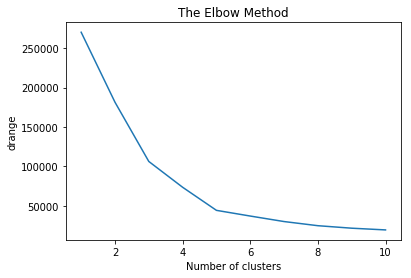

In [38]:
## Deciding the no of clusters
from sklearn.cluster import KMeans
drange = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    drange.append(kmeans.inertia_)
plt.plot(range(1, 11), drange)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('drange')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
encoded_sex = encode.fit_transform(df.iloc[:, 0])
print(encoded_sex)

[1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1]


In [18]:
df['Gender'] = encoded_sex

In [19]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Gender
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [20]:
df.drop('Genre', axis=1, inplace=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [22]:
df.shape

(200, 4)

In [21]:
from sklearn.decomposition import PCA
pca_reducer = PCA(n_components=2)
reduced_data = pca_reducer.fit_transform(df)
reduced_data.shape

(200, 2)

In [28]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
cluster = km.fit(reduced_data)
cluster

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

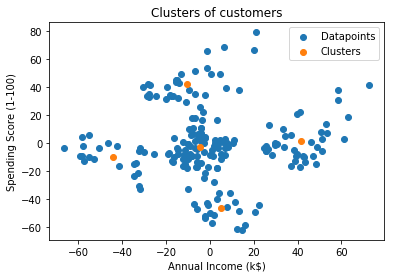

In [29]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], label='Datapoints')
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], label='Clusters')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [33]:
from kmeans_numpy import *
km_numpy = KMeans_numpy(n_clusters=5, tolerance=0.0001)
clusters, clustered_data = km_numpy.fit(reduced_data)

In [34]:
clusters = np.array(clusters)
cluster_one_data = np.array(clustered_data[0])
cluster_two_data = np.array(clustered_data[1])
cluster_three_data = np.array(clustered_data[2])
cluster_four_data = np.array(clustered_data[3])
cluster_five_data = np.array(clustered_data[4])

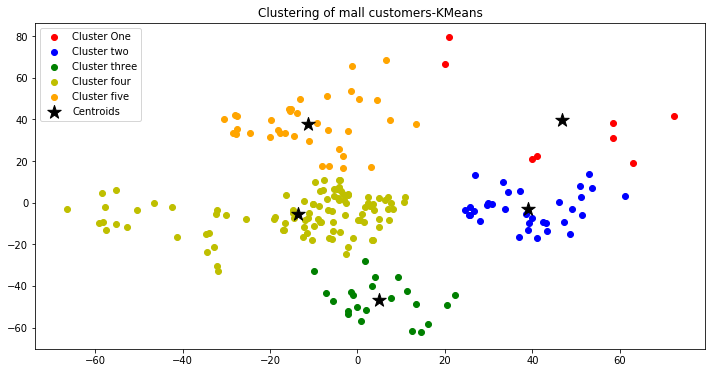

In [37]:
plt.figure(figsize=(12, 6))
plt.scatter(cluster_one_data[:, 0], cluster_one_data[:, 1], c='r', label='Cluster One')
plt.scatter(cluster_two_data[:, 0], cluster_two_data[:, 1], c='b', label='Cluster two')
plt.scatter(cluster_three_data[:, 0], cluster_three_data[:, 1], c='g', label='Cluster three')
plt.scatter(cluster_four_data[:, 0], cluster_four_data[:, 1], c='y', label='Cluster four')
plt.scatter(cluster_five_data[:, 0], cluster_five_data[:, 1], color='orange', label='Cluster five')
plt.scatter(clusters[:, 0], clusters[:, 1], marker='*', s=200, color='black', label='Centroids')
plt.title("Clustering of mall customers-KMeans")
plt.legend()
plt.show()

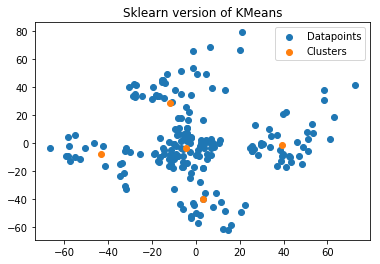

In [36]:
from sklearn.cluster import MeanShift
mshift = MeanShift(bandwidth=25)
cluster_mean = mshift.fit(reduced_data)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], label='Datapoints')
plt.scatter(cluster_mean.cluster_centers_[:, 0], cluster_mean.cluster_centers_[:, 1], label='Clusters')
plt.title("Clustering of Mall Clusters")
plt.legend()
plt.show()

### Analyze each clusters

In [40]:
full_data_kmeans = KMeans_numpy(n_clusters=5)
centroids, clus_data = full_data_kmeans.fit(df.values)

/home/ec2-user/SageMaker/kmeans_numpy.py:60: RuntimeWarning: divide by zero encountered in true_divide
  if np.sum((current_centroid - original_centroid)/original_centroid*100.0) > self.tol:


In [45]:
cluster_1 = pd.DataFrame(clus_data[0], columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender'])
cluster_2 = pd.DataFrame(clus_data[1], columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender'])
cluster_3 = pd.DataFrame(clus_data[2], columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender'])
cluster_4 = pd.DataFrame(clus_data[3], columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender'])
cluster_5 = pd.DataFrame(clus_data[4], columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender'])

### Cluster 1 characteristics
#### Low spenders - Low annual income (Least attractive of customer segment)
Average age - 45/ Average annual income - 26K / Spending score - 20/ Mostly-Female

In [46]:
cluster_1.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,1
1,20,16,6,0
2,31,17,40,0
3,35,18,6,0
4,64,19,3,1


In [47]:
cluster_1.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender
count,23.000000,23.000000,23.000000,23.000000
mean,45.217391,26.304348,20.913043,0.391304
std,13.228607,7.893811,13.017167,0.499011
min,19.000000,15.000000,3.000000,0.000000
25%,35.500000,19.500000,9.500000,0.000000
50%,46.000000,25.000000,17.000000,0.000000
75%,53.500000,33.000000,33.500000,1.000000
max,67.000000,39.000000,40.000000,1.000000


### Cluster 2 characteristics
#### Medium spenders with medium (~50K) annual income.
Average age - 43/ Average annual income - 55K / Spending score - 49/ Mostly-Female

In [48]:
cluster_2.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,50,40,55,0
1,27,40,47,0
2,29,40,42,0
3,31,40,42,0
4,49,42,52,0


In [49]:
cluster_2.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender
count,76.000000,76.000000,76.000000,76.000000
mean,43.934211,55.210526,49.447368,0.407895
std,16.202334,8.471624,6.075952,0.494709
min,18.000000,40.000000,35.000000,0.000000
25%,28.500000,48.000000,44.750000,0.000000
50%,47.000000,55.500000,49.500000,0.000000
75%,55.500000,62.000000,55.000000,1.000000
max,70.000000,71.000000,60.000000,1.000000


### Cluster 3 characteristics (TARGET this segment for campaigns)
#### Low spenders with high annual income
Average age - 40/ Average annual income - 87K / Spending score - 18/ Mostly-Male

In [50]:
cluster_3.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender
count,37.000000,37.000000,37.000000,37.000000
mean,40.324324,87.432432,18.189189,0.513514
std,11.525465,16.272916,10.715611,0.506712
min,19.000000,70.000000,1.000000,0.000000
25%,34.000000,77.000000,10.000000,0.000000
50%,41.000000,81.000000,16.000000,1.000000
75%,47.000000,97.000000,26.000000,1.000000
max,59.000000,137.000000,40.000000,1.000000


In [51]:
cluster_3.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,23,70,29,0
1,59,71,11,1
2,47,71,9,1
3,25,72,34,0
4,20,73,5,1


### Cluster 4 characteristics (High Spender with High Loyalty)
#### High spenders with high annual income - These are your 2nd best customers
Average age - 33/ Average annual income - 87K / Spending score - 82/ Mostly-Female

In [52]:
cluster_4.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender
count,39.000000,39.000000,39.000000,39.000000
mean,32.692308,86.538462,82.128205,0.461538
std,3.728650,16.312485,9.364489,0.505035
min,27.000000,69.000000,63.000000,0.000000
25%,30.000000,75.500000,74.500000,0.000000
50%,32.000000,79.000000,83.000000,0.000000
75%,35.500000,95.000000,90.000000,1.000000
max,40.000000,137.000000,97.000000,1.000000


In [53]:
cluster_4.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,39,69,91,1
1,31,70,77,0
2,40,71,95,1
3,38,71,75,1
4,39,71,75,1


### Cluster 5 characteristics (High Spender - Most Loyal customers)
#### High spending millennials with low annual income - These are your best customers
Average age - 25/ Average annual income - 28K / Spending score - 77/ Mostly-Female

In [55]:
cluster_5.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender
count,25.000000,25.00000,25.000000,25.000000
mean,24.960000,28.04000,77.000000,0.440000
std,5.412024,9.65436,11.803954,0.506623
min,18.000000,15.00000,59.000000,0.000000
25%,21.000000,20.00000,72.000000,0.000000
50%,23.000000,28.00000,76.000000,0.000000
75%,30.000000,34.00000,82.000000,1.000000
max,35.000000,48.00000,99.000000,1.000000


In [56]:
cluster_5.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,21,15,81,1
1,23,16,77,0
2,22,17,76,0
3,23,18,94,0
4,30,19,72,0
